### Clear variables

In [75]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Import all toolboxes

In [76]:
# Basic lib imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from scipy import stats
import seaborn as sns
import pickle
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import math
from scipy.stats import zscore

### Import Schizconnect data
&nbsp; &nbsp; 1\. SAPS & SANS data

&nbsp; &nbsp; 2\. Demographic information

&nbsp; &nbsp; 3\. AAL atlas thickness information

&nbsp; &nbsp; 4\. QC information

In [77]:
# SAPS & SANS data
fBIRN_SAPS_SANS_data = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T1_5/fBIRN/schizconnect_fBIRNPhaseII__0010_assessmentData_2800.csv')
fBIRN_SAPS_SANS_data_T3 = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T3/fBIRN/schizconnect_fBIRNPhaseII__0010_assessmentData_2801.csv')
fBIRN_SAPS_SANS_data_T4 = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T4/fBIRN/schizconnect_fBIRNPhaseII__0010_assessmentData_2803.csv')
#NMorph_SAPS_SANS_data = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T3/NMorph/schizconnect_NMorphCH_assessmentData_2801_alteredNMorph_AT.csv')
NMorph_SAPS_SANS_data = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T3/NMorph/schizconnect_NMorphCH_assessmentData_2801.csv')
NUSDAST_SAPS_SANS_data = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T1_5/NUSDAST/schizconnect_NUSDAST_assessmentData_2800.csv')
all_SAPSnSANS_data = pd.concat([fBIRN_SAPS_SANS_data, fBIRN_SAPS_SANS_data_T3, fBIRN_SAPS_SANS_data_T4, NMorph_SAPS_SANS_data, NUSDAST_SAPS_SANS_data])

# demographic information
T1_5_metaData = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T1_5/schizconnect_metaData_2800.csv')
#T3_metaData = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T3/schizconnect_metaData_2801_alteredNMorph_AT.csv')
T3_metaData = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T3/schizconnect_metaData_2801.csv')
T4_metaData = pd.read_csv('/data/chamal/projects/atalpala/raw_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/T4/fBIRN/schizconnect_metaData_2803.csv')
all_metaData = pd.concat([T1_5_metaData, T3_metaData, T4_metaData])

# thickness data
fBIRN_T1_5_AAL_thickness = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/fBIRN/T1_5/fixed/fBIRN_T1_5_AAL.csv')
fBIRN_T3_AAL_thickness = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/fBIRN/T3/fixed/fBIRN_T3_AAL.csv')
#NMorph_AAL_thickness = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/aal_values.csv')
#NMorph_AAL_thickness_missing = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/missing_input/missing_NMorph_aal.csv')
NMorph_AAL_thickness = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/input_fixed_naming/NMorph_AAL.csv')
NUSDAST_AAL_thickness_averages = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NUSDAST/averages/AAL_script_outputfile.csv')
NUSDAST_AAL_thickness_FLASH = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NUSDAST/FLASH/AAL_values.csv')
#all_thickness_data = pd.concat([fBIRN_T1_5_AAL_thickness, fBIRN_T3_AAL_thickness, NMorph_AAL_thickness, NMorph_AAL_thickness_missing, NUSDAST_AAL_thickness_averages, NUSDAST_AAL_thickness_FLASH])
all_thickness_data = pd.concat([fBIRN_T1_5_AAL_thickness, fBIRN_T3_AAL_thickness, NMorph_AAL_thickness, NUSDAST_AAL_thickness_averages, NUSDAST_AAL_thickness_FLASH])

# QC info
fBIRN_T1_5_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/fBIRN/T1_5/fixed/QC/T1_5_fBIRN_QC_AT',header=None)
fBIRN_T3_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/fBIRN/T3/fixed/QC/T3_fBIRN_QC_AT',header=None)
#NMorph_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/output/verify/NMorph_QC_AT_2',header=None)
NMorph_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/input_fixed_naming/output/verify/NMorph_QC_AT',header=None)
NMorph_missing_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/missing_input/output/verify/NMorph_missing_AT_QC',header=None)
NUSDAST_averages_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NUSDAST/averages/output/verify/NUSDAST_QC_AT',header=None)
NUSDAST_FLASH_QC = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NUSDAST/FLASH/output/verify/FLASH_SZ_AT_QC',header=None)
all_QC_info = pd.concat([fBIRN_T1_5_QC, fBIRN_T3_QC, NMorph_QC, NMorph_missing_QC, NUSDAST_averages_QC, NUSDAST_FLASH_QC])

#### Fix fBIRN SAPS/SANS coding
##### fBIRN SAPS and SANS labels are coded as follows:
##### &nbsp; &nbsp; SANS
&nbsp; &nbsp; sans01: Unchanging Facial Expression

&nbsp; &nbsp; sans02: SS12

&nbsp; &nbsp; sans03: SS13

&nbsp; &nbsp; sans04: SS14

&nbsp; &nbsp; sans05: SS15

&nbsp; &nbsp; **sans06: SS18**

&nbsp; &nbsp; **sans07: SS16**

&nbsp; &nbsp; **sans08: SS17**

&nbsp; &nbsp; sans08 : SS19

&nbsp; &nbsp; **.**

&nbsp; &nbsp; **.**

&nbsp; &nbsp; **.**

&nbsp; &nbsp; sans25 : SS35

&nbsp; &nbsp; saps01 : SS36

&nbsp; &nbsp; saps02 : SS37

&nbsp; &nbsp; saps03 : SS38

&nbsp; &nbsp; **.**

&nbsp; &nbsp; **.**

&nbsp; &nbsp; **.**

&nbsp; &nbsp; saps34 : SS69

In [80]:
# make a copy before changing fields
copy_of_all_SAPSnSANS_data = all_SAPSnSANS_data.copy()

# change fBIRN SANS labels
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=='Unchanging Facial Expression'] = 'sans1'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS12"] = 'sans2'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS13"] = 'sans3'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS14"] = 'sans4'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS15"] = 'sans5'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS18"] = 'sans6'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS16"] = 'sans7'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS17"] = 'sans8'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS19"] = 'sans9'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS20"] = 'sans10'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS21"] = 'sans11'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS22"] = 'sans12'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS23"] = 'sans13'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS24"] = 'sans14'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS25"] = 'sans15'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS26"] = 'sans16'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS27"] = 'sans17'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS28"] = 'sans18'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS29"] = 'sans19'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS30"] = 'sans20'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS31"] = 'sans21'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS32"] = 'sans22'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS33"] = 'sans23'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS34"] = 'sans24'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS35"] = 'sans25'

# change fBIRN SAPS labels
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS36"] = 'saps1'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS37"] = 'saps2'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS38"] = 'saps3'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS39"] = 'saps4'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS40"] = 'saps5'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS41"] = 'saps6'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS42"] = 'saps7'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS43"] = 'saps8'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS44"] = 'saps9'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS45"] = 'saps10'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS46"] = 'saps11'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS47"] = 'saps12'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS48"] = 'saps13'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS49"] = 'saps14'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS50"] = 'saps15'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS51"] = 'saps16'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS52"] = 'saps17'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS53"] = 'saps18'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS54"] = 'saps19'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS55"] = 'saps20'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS56"] = 'saps21'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS57"] = 'saps22'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS58"] = 'saps23'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS59"] = 'saps24'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS60"] = 'saps25'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS61"] = 'saps26'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS62"] = 'saps27'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS63"] = 'saps28'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS64"] = 'saps29'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS65"] = 'saps30'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS66"] = 'saps31'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS67"] = 'saps32'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS68"] = 'saps33'
all_SAPSnSANS_data['question_id'].loc[all_SAPSnSANS_data['question_id']=="SS69"] = 'saps34'

#### Extract only SZ patients

In [81]:
# remove normal controls 
temp = all_metaData[all_metaData['dx'] != 'No_Known_Disorder']
all_metaData_SZ = temp[temp['dx'] != 'Sibling_of_No_Known_Disorder']
print all_metaData_SZ.shape

(2774, 17)


In [82]:
print 'fBIRN thickness and QC:'
print [fBIRN_T1_5_vertex_thickness.shape,fBIRN_T1_5_QC.shape]
print [fBIRN_T3_vertex_thickness.shape,fBIRN_T3_QC.shape]
print 'NMorph & missing thickness and QC:'
print [NMorph_vertex_thickness.shape,NMorph_QC.shape]
#print [NMorph_AAL_thickness_missing.shape,NMorph_missing_QC.shape]
print 'NUSDAST averages & FLASH thickness and QC:'
print [NUSDAST_vertex_thickness_averages.shape,NUSDAST_averages_QC.shape]
print [NUSDAST_vertex_thickness_FLASH.shape,NUSDAST_FLASH_QC.shape]
print 'ALL SAPS/SANS, demo, thickness, QC:'
print [all_SAPSnSANS_data.shape,all_metaData.shape,all_vertex_thickness_data.shape,all_QC_info.shape]

fBIRN thickness and QC:
[(16, 81925), (16, 2)]
[(90, 81925), (90, 2)]
NMorph & missing thickness and QC:
[(191, 81925), (191, 2)]
NUSDAST averages & FLASH thickness and QC:
[(208, 81925), (208, 2)]
[(54, 81925), (54, 2)]
ALL SAPS/SANS, demo, thickness, QC:
[(42135, 9), (4442, 17), (559, 81925), (563, 2)]


In [83]:
print 'fBIRN thickness and QC:'
print [fBIRN_T1_5_AAL_thickness.shape,fBIRN_T1_5_QC.shape]
print [fBIRN_T3_AAL_thickness.shape,fBIRN_T3_QC.shape]
print 'NMorph & missing thickness and QC:'
print [NMorph_AAL_thickness.shape,NMorph_QC.shape]
#print [NMorph_AAL_thickness_missing.shape,NMorph_missing_QC.shape]
print 'NUSDAST averages & FLASH thickness and QC:'
print [NUSDAST_AAL_thickness_averages.shape,NUSDAST_averages_QC.shape]
print [NUSDAST_AAL_thickness_FLASH.shape,NUSDAST_FLASH_QC.shape]
print 'ALL SAPS/SANS, demo, thickness, QC:'
print [all_SAPSnSANS_data.shape,all_metaData.shape,all_thickness_data.shape,all_QC_info.shape]

fBIRN thickness and QC:
[(16, 241), (16, 2)]
[(90, 241), (90, 2)]
NMorph & missing thickness and QC:
[(196, 241), (191, 2)]
NUSDAST averages & FLASH thickness and QC:
[(208, 241), (208, 2)]
[(54, 241), (54, 2)]
ALL SAPS/SANS, demo, thickness, QC:
[(42135, 9), (4442, 17), (564, 241), (563, 2)]


### Create spreadsheet containing AAL thickness and demographic information for each patient id
&nbsp; &nbsp; **filtered by QC data**

In [555]:
subjectIDsThickness = pd.DataFrame()

for i in range(NMorph_AAL_thickness['subject'].shape[0]):
    # AAL thickness data
    a = NMorph_AAL_thickness['subject'][i]
    b = a.split("_")
    c = b[1][:2].upper() + b[1][2:].lower()
    new_record = pd.DataFrame([[c]],columns=['subjectid'])
    subjectIDsThickness = pd.concat([subjectIDsThickness,new_record], ignore_index=True)
NMorph_AAL_thickness['subjectid'] = subjectIDsThickness
NMorph_AAL_thickness['dataset'] = 'NMorph'
NMorph_QC['subjectid'] = subjectIDsThickness

subjectIDsThickness = pd.DataFrame()
for i in range(fBIRN_T1_5_AAL_thickness['subject'].shape[0]):
    # AAL thickness data
    a = fBIRN_T1_5_AAL_thickness['subject'][i]
    b = a.split("_")
    c = b[0][:12]
    new_record = pd.DataFrame([[c]],columns=['subjectid'])
    subjectIDsThickness = pd.concat([subjectIDsThickness,new_record], ignore_index=True)
fBIRN_T1_5_AAL_thickness['subjectid'] = subjectIDsThickness  
fBIRN_T1_5_AAL_thickness['dataset'] = 'fBIRN'
fBIRN_T1_5_QC['subjectid'] = subjectIDsThickness  

subjectIDsThickness = pd.DataFrame()
for i in range(fBIRN_T3_AAL_thickness['subject'].shape[0]):
    # AAL thickness data
    a = fBIRN_T3_AAL_thickness['subject'][i]
    b = a.split("_")
    c = b[0][:12]
    new_record = pd.DataFrame([[c]],columns=['subjectid'])
    subjectIDsThickness = pd.concat([subjectIDsThickness,new_record], ignore_index=True)
fBIRN_T3_AAL_thickness['subjectid'] = subjectIDsThickness  
fBIRN_T3_AAL_thickness['dataset'] = 'fBIRN'
fBIRN_T3_QC['subjectid'] = subjectIDsThickness  

# subjectIDsThickness = pd.DataFrame()
# for i in range(NMorph_AAL_thickness_missing['subject'].shape[0]):
#     a = NMorph_AAL_thickness_missing['subject'][i]
#     b = a.split("_")
#     r = b[2]
#     s = r.split(".")
#     c = s[0]
#     new_record = pd.DataFrame([[c]],columns=['subjectid'])
#     subjectIDsThickness = pd.concat([subjectIDsThickness,new_record], ignore_index=True)
# NMorph_AAL_thickness_missing['subjectid'] = subjectIDsThickness  
# NMorph_AAL_thickness_missing['dataset'] = 'NMorph'
# NMorph_missing_QC['subjectid'] = subjectIDsThickness 

subjectIDsThickness = pd.DataFrame()
for i in range(NUSDAST_AAL_thickness_averages['subject'].shape[0]):
    a = NUSDAST_AAL_thickness_averages['subject'][i]
    b = a.split("_")
    c = b[11]
    new_record = pd.DataFrame([[c]],columns=['subjectid'])
    subjectIDsThickness = pd.concat([subjectIDsThickness,new_record], ignore_index=True)
NUSDAST_AAL_thickness_averages['subjectid'] = subjectIDsThickness 
NUSDAST_AAL_thickness_averages['dataset'] = 'NUSDAST'
NUSDAST_averages_QC['subjectid'] = subjectIDsThickness

subjectIDsThickness = pd.DataFrame()
for i in range(NUSDAST_AAL_thickness_FLASH['subject'].shape[0]):
    a = NUSDAST_AAL_thickness_FLASH['subject'][i]
    b = a.split("_")
    c = b[11]
    new_record = pd.DataFrame([[c]],columns=['subjectid'])
    subjectIDsThickness = pd.concat([subjectIDsThickness,new_record], ignore_index=True)
NUSDAST_AAL_thickness_FLASH['subjectid'] = subjectIDsThickness 
NUSDAST_AAL_thickness_FLASH['dataset'] = 'NUSDAST'
NUSDAST_FLASH_QC['subjectid'] = subjectIDsThickness

#all_thickness_wSubjectIDs = pd.concat([NMorph_AAL_thickness, fBIRN_T1_5_AAL_thickness, fBIRN_T3_AAL_thickness, NMorph_AAL_thickness_missing, NUSDAST_AAL_thickness_averages, NUSDAST_AAL_thickness_FLASH])
all_thickness_wSubjectIDs = pd.concat([NMorph_AAL_thickness, fBIRN_T1_5_AAL_thickness, fBIRN_T3_AAL_thickness, NUSDAST_AAL_thickness_averages, NUSDAST_AAL_thickness_FLASH])
#all_QC_wSubjectIDs = pd.concat([NMorph_QC, fBIRN_T1_5_QC, fBIRN_T3_QC, NMorph_missing_QC, NUSDAST_averages_QC, NUSDAST_FLASH_QC])
all_QC_wSubjectIDs = pd.concat([NMorph_QC, fBIRN_T1_5_QC, fBIRN_T3_QC, NUSDAST_averages_QC, NUSDAST_FLASH_QC])

# add demographic information
t = all_thickness_wSubjectIDs.merge(all_metaData_SZ, how='left', on='subjectid')
te = t.merge(all_QC_wSubjectIDs, how='left', on='subjectid')
print te.shape

#tem = te
tem = te[te['age'].isnull() == False]
print tem.shape

tem = tem.rename(columns={0: 'id', 1: 'QC'})
temp = tem[((tem['QC'] == 1.0) | (tem['QC'] == 0.5))]
print temp.shape

mergedData_wOut_duplicates = temp.drop_duplicates(['subjectid'])
print mergedData_wOut_duplicates.shape

(4592, 261)
(4264, 261)
(3666, 261)
(232, 261)


#### Pad fBIRN subjectid data with zeros such that it matches SAPS and SANS data

In [556]:
# pad fBIRN subject id with zeros
copy_of_all_SAPSnSANS_data_slice = all_SAPSnSANS_data.copy()
all_SAPSnSANS_data.iloc[:7691]['subjectid'] = pd.Series(all_SAPSnSANS_data.iloc[:7691]['subjectid']).astype(str).str.zfill(12)

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [557]:
all_SAPSnSANS_data.iloc[:7691]['subjectid'] = pd.Series(all_SAPSnSANS_data.iloc[:7691]['subjectid']).astype(str).str.zfill(12)

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Create SAPS and SANS spreadsheet by subject id 

In [558]:
SAPSnSANS_data = pd.DataFrame()
for i in range(mergedData_wOut_duplicates.shape[0]):
    d = all_SAPSnSANS_data[all_SAPSnSANS_data['subjectid']== mergedData_wOut_duplicates.iloc[i]['subjectid']]
    visit0 = d[((d['visit'].astype(str) == '0.0') | (d['visit'].isnull() == True) | (d['visit'].astype(str) == 'nan'))]
    if (visit0.shape[0] == 0): visit0 = d[(d['visit'].astype(str) == '24.0')]
    if (visit0.shape[0] == 0): print "no info"
    new_record = pd.DataFrame([[visit0.iloc[0]['subjectid'],np.array(visit0[visit0['question_id'].astype(str) == 'sans1']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans2']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans3']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans4']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans5']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans6']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans7']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans8']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans9']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans10']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans11']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans12']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans13']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans14']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans15']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans16']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans17']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans18']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans19']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans20']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans21']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans22']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans23']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans24']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'sans25']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps1']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps2']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps3']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps4']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps5']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps6']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps7']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps8']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps9']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps10']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps11']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps12']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps13']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps14']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps15']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps16']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps17']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps18']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps19']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps20']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps21']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps22']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps23']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps24']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps25']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps26']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps27']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps28']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps29']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps30']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps31']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps32']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps33']['question_value']),np.array(visit0[visit0['question_id'].astype(str) == 'saps34']['question_value'])]],columns=['subjectid','sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34'])
    new_record['dataset'] = mergedData_wOut_duplicates.iloc[i]['dataset']
    SAPSnSANS_data = pd.concat([SAPSnSANS_data,new_record], ignore_index=True)
#print SAPSnSANS_data

    subjectid  sans1  sans2  sans3  sans4  sans5  sans6  sans7  sans8  sans9  \
0     CH7259b  [4.0]  [3.0]  [4.0]  [3.0]  [4.0]  [0.0]  [4.0]  [4.0]  [4.0]   
1     CH7852a  [4.0]  [3.0]  [3.0]  [3.0]  [1.0]  [0.0]  [3.0]  [3.0]  [3.0]   
2      CH7957  [4.0]  [4.0]  [4.0]  [0.0]  [4.0]  [0.0]  [4.0]  [4.0]  [5.0]   
3      CH3098  [2.0]  [0.0]  [0.0]  [0.0]  [0.0]  [2.0]  [0.0]  [2.0]  [0.0]   
4      CH3183  [4.0]  [4.0]  [4.0]  [4.0]  [3.0]  [0.0]  [4.0]  [4.0]  [3.0]   
5     CH7272b  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]   
6     CH7353a  [3.0]  [3.0]  [3.0]  [2.0]  [2.0]  [0.0]  [3.0]  [3.0]  [0.0]   
7     CH7724b  [2.0]  [2.0]  [2.0]  [0.0]  [1.0]  [0.0]  [2.0]  [2.0]  [3.0]   
8     CH8883a  [2.0]  [3.0]  [2.0]  [3.0]  [3.0]  [0.0]  [3.0]  [3.0]  [0.0]   
9     CH7539a  [5.0]  [5.0]  [5.0]  [5.0]  [5.0]  [0.0]  [5.0]  [5.0]  [5.0]   
10    CH8941a  [3.0]  [0.0]  [0.0]  [2.0]  [0.0]  [0.0]  [0.0]  [2.0]  [0.0]   
11    CH7875b  [2.0]  [3.0]  [2.0]  [0.0

### Save thickness&demographic and SAPS/SANS spreadsheets
&nbsp; &nbsp; **both with matching subject id's**

In [559]:
mergedData_wOut_duplicates.to_csv('mergedData_wOut_duplicates.csv', sep=',')
SAPSnSANS_data.to_csv('SAPSnSANS_data.csv', sep=',')

### Check spreadsheet info and save as SAPSnSANS_data_toCheck.csv and mergedData_wOut_duplicates_toCheck.csv

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Basic lib imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from scipy import stats
import seaborn as sns
import pickle
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import math
from scipy.stats import zscore

In [285]:
# vertex-wise thickness data
fBIRN_T1_5_vertex_thickness_wNull = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/fBIRN/T1_5/fixed/fBIRN_T1_5.csv',header=None)
fBIRN_T1_5_vertex_thickness = fBIRN_T1_5_vertex_thickness_wNull.loc[pd.notnull(fBIRN_T1_5_vertex_thickness_wNull[1])]

fBIRN_T3_vertex_thickness_wNull = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/fBIRN/T3/fixed/fBIRN_T3.csv',header=None)
fBIRN_T3_vertex_thickness = fBIRN_T3_vertex_thickness_wNull.loc[pd.notnull(fBIRN_T3_vertex_thickness_wNull[1])]

NMorph_vertex_thickness_wNull = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NMorph/3T/input_fixed_naming/NMorph.csv',header=None)
NMorph_vertex_thickness = NMorph_vertex_thickness_wNull.loc[pd.notnull(NMorph_vertex_thickness_wNull[1])]

NUSDAST_vertex_thickness_averages_wNull = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NUSDAST/averages/NUSDAST_averages.csv',header=None)
NUSDAST_vertex_thickness_averages = NUSDAST_vertex_thickness_averages_wNull.loc[pd.notnull(NUSDAST_vertex_thickness_averages_wNull[1])]

NUSDAST_vertex_thickness_FLASH_wNull = pd.read_csv('/data/chamal/projects/atalpala/processed_data/from_Schizconnect_T1_NC_SZ_SAPS_SANS_XC/CIVET/NUSDAST/FLASH/NUSDAST_FLASH.csv',header=None)
NUSDAST_vertex_thickness_FLASH = NUSDAST_vertex_thickness_FLASH_wNull.loc[pd.notnull(NUSDAST_vertex_thickness_FLASH_wNull[1])]
all_vertex_thickness_data = pd.concat([fBIRN_T1_5_vertex_thickness, fBIRN_T3_vertex_thickness, NMorph_vertex_thickness, NUSDAST_vertex_thickness_averages, NUSDAST_vertex_thickness_FLASH])

In [286]:
all_vertex_thickness_data.rename(columns={0: 'subjectid'}, inplace=True)
all_vertex_thickness_data = all_vertex_thickness_data.fillna(value=0)
#print all_vertex_thickness_data['subjectid']
print all_vertex_thickness_data.shape

(559, 81925)


In [287]:
#clinData = pd.read_csv('SAPSnSANS_data_final.csv')
#demo_thickData = pd.read_csv('mergedData_wOut_duplicates_final.csv')
demo_thickData = pd.read_csv('mergedData_wOut_duplicates_final_forVertexAnalysis.csv')
# clinData = pd.read_csv('SAPSnSANS_data_final_justNUSDAST.csv')
# demo_thickData = pd.read_csv('mergedData_wOut_duplicates_final_justNUSDAST.csv')

# clinData = pd.read_csv('SAPSnSANS_data_final_NMorph.csv')
# demo_thickData = pd.read_csv('mergedData_wOut_duplicates_final_NMorph.csv')
clinData = pd.read_csv('SAPSnSANS_data_final_forVertexAnalysis.csv')

print clinData.columns
print demo_thickData.columns[240:]

# replace NaN's and missing values with 0s
clinData = clinData.fillna(value=0)

Index([u'Unnamed: 0', u'subjectid', u'sans1', u'sans2', u'sans3', u'sans4',
       u'sans5', u'sans6', u'sans7', u'sans8', u'sans9', u'sans10', u'sans11',
       u'sans12', u'sans13', u'sans14', u'sans15', u'sans16', u'sans17',
       u'sans18', u'sans19', u'sans20', u'sans21', u'sans22', u'sans23',
       u'sans24', u'sans25', u'saps1', u'saps2', u'saps3', u'saps4', u'saps5',
       u'saps6', u'saps7', u'saps8', u'saps9', u'saps10', u'saps11', u'saps12',
       u'saps13', u'saps14', u'saps15', u'saps16', u'saps17', u'saps18',
       u'saps19', u'saps20', u'saps21', u'saps22', u'saps23', u'saps24',
       u'saps25', u'saps26', u'saps27', u'saps28', u'saps29', u'saps30',
       u'saps31', u'saps32', u'saps33', u'saps34', u'dataset'],
      dtype='object')
Index([u'ITG.R_CV', u'Total.R_CV', u'subjectid', u'dataset', u'study', u'age',
       u'sex', u'dx', u'field_strength', u'img_date', u'datauri', u'maker',
       u'model', u'szc_protocol_hier', u'notes', u'imaging_protocol_site',
     

In [347]:
#clinData['age'] = demo_thickData['age']
demo_thickData['sex'] = demo_thickData['sex'].astype('category')
demo_thickData['sex']  = demo_thickData['sex'].cat.rename_categories([0,1])

#clinData['sex'] = demo_thickData['sex']

justDemo = demo_thickData[['subject','subjectid','dataset','age','sex','id','QC']]
justDemo.ix[justDemo['dataset'] == 'fBIRN', 'subjectid'] = justDemo.ix[justDemo['dataset'] == 'fBIRN', 'subjectid'].astype(int)

justCT = demo_thickData[['subject','dataset','age','sex',u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
       u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
       u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
       u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
       u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
       u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
       u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
       u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
       u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
       u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
       u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
       u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
       u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
       u'ITG.R_CT', u'Mean.R_CT']]
justCT['dataset'] = demo_thickData['dataset'].astype('category').cat.rename_categories([0,1,2])

justSA = demo_thickData[['subject','dataset','age','sex',u'PreCG.L_SA', u'SFGdor.L_SA',
       u'ORBsup.L_SA', u'MFG.L_SA', u'ORBmid.L_SA', u'IFGoperc.L_SA',
       u'IFGtriang.L_SA', u'ORBinf.L_SA', u'ROL.L_SA', u'SMA.L_SA',
       u'OLF.L_SA', u'SFGmed.L_SA', u'ORBsupmed.L_SA', u'REC.L_SA',
       u'INS.L_SA', u'ACG.L_SA', u'DCG.L_SA', u'PCG.L_SA', u'PHG.L_SA',
       u'CAL.L_SA', u'CUN.L_SA', u'LING.L_SA', u'SOG.L_SA', u'MOG.L_SA',
       u'IOG.L_SA', u'FFG.L_SA', u'PoCG.L_SA', u'SPG.L_SA', u'IPL.L_SA',
       u'SMG.L_SA', u'ANG.L_SA', u'PCUN.L_SA', u'PCL.L_SA', u'HES.L_SA',
       u'STG.L_SA', u'TPOsup.L_SA', u'MTG.L_SA', u'TPOmid.L_SA', u'ITG.L_SA',
       u'Total.L_SA', u'PreCG.R_SA', u'SFGdor.R_SA', u'ORBsup.R_SA',
       u'MFG.R_SA', u'ORBmid.R_SA', u'IFGoperc.R_SA', u'IFGtriang.R_SA',
       u'ORBinf.R_SA', u'ROL.R_SA', u'SMA.R_SA', u'OLF.R_SA', u'SFGmed.R_SA',
       u'ORBsupmed.R_SA', u'REC.R_SA', u'INS.R_SA', u'ACG.R_SA', u'DCG.R_SA',
       u'PCG.R_SA', u'PHG.R_SA', u'CAL.R_SA', u'CUN.R_SA', u'LING.R_SA',
       u'SOG.R_SA', u'MOG.R_SA', u'IOG.R_SA', u'FFG.R_SA', u'PoCG.R_SA',
       u'SPG.R_SA', u'IPL.R_SA', u'SMG.R_SA', u'ANG.R_SA', u'PCUN.R_SA',
       u'PCL.R_SA', u'HES.R_SA', u'STG.R_SA', u'TPOsup.R_SA', u'MTG.R_SA',
       u'TPOmid.R_SA', u'ITG.R_SA', u'Total.R_SA']]

justCV = demo_thickData[['subject','dataset','age','sex', u'PreCG.L_CV', u'SFGdor.L_CV',
       u'ORBsup.L_CV', u'MFG.L_CV', u'ORBmid.L_CV', u'IFGoperc.L_CV',
       u'IFGtriang.L_CV', u'ORBinf.L_CV', u'ROL.L_CV', u'SMA.L_CV',
       u'OLF.L_CV', u'SFGmed.L_CV', u'ORBsupmed.L_CV', u'REC.L_CV',
       u'INS.L_CV', u'ACG.L_CV', u'DCG.L_CV', u'PCG.L_CV', u'PHG.L_CV',
       u'CAL.L_CV', u'CUN.L_CV', u'LING.L_CV', u'SOG.L_CV', u'MOG.L_CV',
       u'IOG.L_CV', u'FFG.L_CV', u'PoCG.L_CV', u'SPG.L_CV', u'IPL.L_CV',
       u'SMG.L_CV', u'ANG.L_CV', u'PCUN.L_CV', u'PCL.L_CV', u'HES.L_CV',
       u'STG.L_CV', u'TPOsup.L_CV', u'MTG.L_CV', u'TPOmid.L_CV', u'ITG.L_CV',
       u'Total.L_CV', u'PreCG.R_CV', u'SFGdor.R_CV', u'ORBsup.R_CV',
       u'MFG.R_CV', u'ORBmid.R_CV', u'IFGoperc.R_CV', u'IFGtriang.R_CV',
       u'ORBinf.R_CV', u'ROL.R_CV', u'SMA.R_CV', u'OLF.R_CV', u'SFGmed.R_CV',
       u'ORBsupmed.R_CV', u'REC.R_CV', u'INS.R_CV', u'ACG.R_CV', u'DCG.R_CV',
       u'PCG.R_CV', u'PHG.R_CV', u'CAL.R_CV', u'CUN.R_CV', u'LING.R_CV',
       u'SOG.R_CV', u'MOG.R_CV', u'IOG.R_CV', u'FFG.R_CV', u'PoCG.R_CV',
       u'SPG.R_CV', u'IPL.R_CV', u'SMG.R_CV', u'ANG.R_CV', u'PCUN.R_CV',
       u'PCL.R_CV', u'HES.R_CV', u'STG.R_CV', u'TPOsup.R_CV', u'MTG.R_CV',
       u'TPOmid.R_CV', u'ITG.R_CV', u'Total.R_CV']]
#print demo_thickData.columns[82:162]

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [349]:
# print all_vertex_thickness_data.shape
# te = all_vertex_thickness_data.drop_duplicates(['subjectid'])
# print te.shape
# print all_vertex_thickness_data['subjectid'].iloc[5]
# print type(all_vertex_thickness_data['subjectid'].iloc[10])
# print te['subjectid'].iloc[3]
# print type(te['subjectid'].iloc[1])
# print all_vertex_thickness_data['subjectid'].iloc[1] == te['subjectid'].iloc[1]
# print justDemo['subjectid'].iloc[45]
# print type(justDemo['subjectid'].iloc[45])
# print justDemo['subjectid'].iloc[45] == te['subjectid'].iloc[3]
# #print justDemo.iloc[45]
# #print justDemo[justDemo['dataset'] == 'fBIRN']['subjectid'].astype(int)

In [290]:
# # add demographic information
# t = all_thickness_wSubjectIDs.merge(all_metaData_SZ, how='left', on='subjectid')
# te = t.merge(all_QC_wSubjectIDs, how='left', on='subjectid')
# print te.shape

# #tem = te
# tem = te[te['age'].isnull() == False]
# print tem.shape

# tem = tem.rename(columns={0: 'id', 1: 'QC'})
# temp = tem[((tem['QC'] == 1.0) | (tem['QC'] == 0.5))]
# print temp.shape

# mergedData_wOut_duplicates = temp.drop_duplicates(['subjectid'])
# print mergedData_wOut_duplicates.shape



#print justDemo
# print all_vertex_thickness_data.shape
# print all_vertex_thickness_data.columns
# print justDemo.shape
# print justDemo.columns
# print all_vertex_thickness_data['subjectid'][1]
# print justDemo['subjectid'][50]

t = all_vertex_thickness_data.merge(justDemo, how='left', on='subjectid')
print t.shape
tem = t[t['age'].isnull() == False]
print tem.shape
temp = tem[((tem['QC'] == 1.0) | (tem['QC'] == 0.5))]
print temp.shape
all_vertex_thickness_data_wOut_duplicates = temp.drop_duplicates(['subjectid'])
print all_vertex_thickness_data_wOut_duplicates.shape
print demo_thickData.shape
all_vertex_thickness_data_wOut_duplicates.to_csv('all_vertex_thickness_data_wOut_duplicates.csv', sep=',')

(559, 81931)
(308, 81931)
(308, 81931)
(229, 81931)
(229, 262)


In [334]:
clinData.ix[clinData['dataset'] == 'fBIRN', 'subjectid'] = clinData.ix[justDemo['dataset'] == 'fBIRN', 'subjectid'].astype(int)
tempo = clinData.merge(all_vertex_thickness_data_wOut_duplicates, how='left', on='subjectid')
print clinData.shape
tempo = tempo.rename(columns={'dataset_x': 'dataset'})
print tempo.columns[0:70]
print tempo.shape
del clinData
clinData = tempo[[u'subjectid',      u'sans1',      u'sans2',
            u'sans3',      u'sans4',      u'sans5',      u'sans6',
            u'sans7',      u'sans8',      u'sans9',     u'sans10',
           u'sans11',     u'sans12',     u'sans13',     u'sans14',
           u'sans15',     u'sans16',     u'sans17',     u'sans18',
           u'sans19',     u'sans20',     u'sans21',     u'sans22',
           u'sans23',     u'sans24',     u'sans25',      u'saps1',
            u'saps2',      u'saps3',      u'saps4',      u'saps5',
            u'saps6',      u'saps7',      u'saps8',      u'saps9',
           u'saps10',     u'saps11',     u'saps12',     u'saps13',
           u'saps14',     u'saps15',     u'saps16',     u'saps17',
           u'saps18',     u'saps19',     u'saps20',     u'saps21',
           u'saps22',     u'saps23',     u'saps24',     u'saps25',
           u'saps26',     u'saps27',     u'saps28',     u'saps29',
           u'saps30',     u'saps31',     u'saps32',     u'saps33',
           u'saps34',  u'dataset']]
print clinData.shape

justVertices = tempo[tempo.columns.difference([u'subjectid',u'sans1',u'sans2',
            u'sans3',      u'sans4',      u'sans5',      u'sans6',
            u'sans7',      u'sans8',      u'sans9',     u'sans10',
           u'sans11',     u'sans12',     u'sans13',     u'sans14',
           u'sans15',     u'sans16',     u'sans17',     u'sans18',
           u'sans19',     u'sans20',     u'sans21',     u'sans22',
           u'sans23',     u'sans24',     u'sans25',      u'saps1',
            u'saps2',      u'saps3',      u'saps4',      u'saps5',
            u'saps6',      u'saps7',      u'saps8',      u'saps9',
           u'saps10',     u'saps11',     u'saps12',     u'saps13',
           u'saps14',     u'saps15',     u'saps16',     u'saps17',
           u'saps18',     u'saps19',     u'saps20',     u'saps21',
           u'saps22',     u'saps23',     u'saps24',     u'saps25',
           u'saps26',     u'saps27',     u'saps28',     u'saps29',
           u'saps30',     u'saps31',     u'saps32',     u'saps33',
           u'saps34', 'dataset', u'QC', u'Unnamed: 0',u'dataset_y', u'id', u'subject'])]

justVertices['dataset'] = tempo['dataset'].astype('category').cat.rename_categories([0,1,2])
#justVertices['dataset']  = justVertices['dataset'].cat.rename_categories([0,1,2])


(229, 61)
Index([u'subjectid',     u'sans1',     u'sans2',     u'sans3',     u'sans4',
           u'sans5',     u'sans6',     u'sans7',     u'sans8',     u'sans9',
          u'sans10',    u'sans11',    u'sans12',    u'sans13',    u'sans14',
          u'sans15',    u'sans16',    u'sans17',    u'sans18',    u'sans19',
          u'sans20',    u'sans21',    u'sans22',    u'sans23',    u'sans24',
          u'sans25',     u'saps1',     u'saps2',     u'saps3',     u'saps4',
           u'saps5',     u'saps6',     u'saps7',     u'saps8',     u'saps9',
          u'saps10',    u'saps11',    u'saps12',    u'saps13',    u'saps14',
          u'saps15',    u'saps16',    u'saps17',    u'saps18',    u'saps19',
          u'saps20',    u'saps21',    u'saps22',    u'saps23',    u'saps24',
          u'saps25',    u'saps26',    u'saps27',    u'saps28',    u'saps29',
          u'saps30',    u'saps31',    u'saps32',    u'saps33',    u'saps34',
         u'dataset',            1,            2,            3,    

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [292]:
print type(clinData['subjectid'].iloc[50])
print type(all_vertex_thickness_data_wOut_duplicates['subjectid'].iloc[50])
print all_vertex_thickness_data_wOut_duplicates.iloc[50:100]
print justVertices.iloc[50:100]
print tempo.iloc[50:100]

<type 'int'>
<type 'int'>
      subjectid        1        2        3        4        5        6  \
83   1806046107  2.23027  3.09416  2.83424  2.81687  2.79295  2.71052   
85   1814461524  2.11641  2.93540  2.93075  2.77139  2.48990  2.72131   
87   1816033517  2.58198  3.22296  3.22709  2.81876  2.73338  2.64159   
88   1835089949  2.32670  2.90239  2.93163  2.67318  2.35997  2.62016   
90   1839278328  2.53754  3.10676  3.04452  2.83375  3.26815  3.05818   
92   1854193267  2.77350  3.56099  3.31218  3.09243  2.90424  3.42767   
94   1874921003  2.40934  3.49067  3.34809  2.64053  3.27705  2.99279   
96   1876264214  2.11587  2.77707  2.58642  2.60901  2.40380  2.61103   
98   1888339354  2.23251  3.30490  3.26627  3.01938  2.65008  2.81441   
100  1889324948  2.68645  3.07849  3.32220  3.02658  3.14470  3.33420   
102  1891733949  2.24512  2.60892  2.81640  2.54334  2.73365  2.90190   
104  1896831287  2.64501  3.56566  3.45670  2.97760  2.92692  3.49787   
108      ch7259  2.45809 

#### zscore within dataset

In [350]:
print clinData[clinData['dataset'] == 'fBIRN'].shape
fBIRN = clinData[clinData['dataset'] == 'fBIRN'][['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']].apply(zscore)
fBIRN = fBIRN.fillna(value=0)
fBIRN_zscored_labels = clinData[clinData['dataset'] == 'fBIRN'][['dataset']]
#fBIRN.insert(0, 'subjectid', clinData[clinData['dataset'] == 'fBIRN']['subjectid'])
print fBIRN.shape

print clinData[clinData['dataset'] == 'NUSDAST'].shape
NUSDAST = clinData[clinData['dataset'] == 'NUSDAST'][['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']].apply(zscore)
NUSDAST = NUSDAST.fillna(value=0)
NUSDAST_zscored_labels = clinData[clinData['dataset'] == 'NUSDAST'][['dataset']]
#NUSDAST.insert(0, 'subjectid', clinData[clinData['dataset'] == 'NUSDAST']['subjectid'])
print NUSDAST.shape

print clinData[clinData['dataset'] == 'NMorph'].shape
NMorph = clinData[clinData['dataset'] == 'NMorph'][['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']].apply(zscore)
NMorph = NMorph.fillna(value=0)
NMorph_zscored_labels = clinData[clinData['dataset'] == 'NMorph'][['dataset']]
#NMorph.insert(0, 'subjectid', clinData[clinData['dataset'] == 'NMorph']['subjectid'])
print NMorph.shape

print fBIRN.shape[0]+NUSDAST.shape[0]+NMorph.shape[0]

clinData_zscored = pd.concat([NMorph,fBIRN,NUSDAST])
data_labels = pd.concat([NMorph_zscored_labels,fBIRN_zscored_labels,NUSDAST_zscored_labels])

# clinData_zscored = pd.concat([NUSDAST])
# data_labels = pd.concat([NUSDAST_zscored_labels])
# print clinData_zscored.shape


(62, 61)
(62, 59)
(124, 61)
(124, 59)
(43, 61)
(43, 59)
229


#### not zscored

In [351]:
# # fBIRN_clean = clinData[clinData['dataset'] == 'fBIRN'][['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']]
# # fBIRN_clean = fBIRN_clean.fillna(value=0)
# # fBIRN_clean_labels = clinData[clinData['dataset'] == 'fBIRN'][['dataset']]

# NUSDAST_clean = clinData[clinData['dataset'] == 'NUSDAST'][['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']]
# NUSDAST_clean = NUSDAST_clean.fillna(value=0)
# NUSDAST_clean_labels = clinData[clinData['dataset'] == 'NUSDAST'][['dataset']]

# # NMorph_clean = clinData[clinData['dataset'] == 'NMorph'][['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10','sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19','sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4','saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14','saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24','saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']]
# # NMorph_clean = NMorph_clean.fillna(value=0)
# # NMorph_clean_labels = clinData[clinData['dataset'] == 'NMorph'][['dataset']]

# # clinData_clean = pd.concat([NMorph_clean,fBIRN_clean,NUSDAST_clean])
# # data_labels = pd.concat([NMorph_clean_labels,fBIRN_clean_labels,NUSDAST_clean_labels])
# # print clinData_clean.shape
# # print data_labels.shape

# clinData_clean = pd.concat([NUSDAST_clean])
# data_labels = pd.concat([NUSDAST_clean_labels])

#### add age and sex into clustering info

In [352]:
# clinData_zscored['sex'] = demo_thickData['sex']
# clinData_zscored['age'] = demo_thickData['sex']
# print clinData_zscored.columns

#### working with zscored data

In [353]:
num_of_clusters = 3

Z = linkage(clinData_zscored,method='average',metric='correlation')
T = sch.fcluster(Z, num_of_clusters, 'maxclust')

print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4),np.sum(T==5),np.sum(T==6)
print np.sum(T==1)+np.sum(T==2)+np.sum(T==3)+np.sum(T==4)+np.sum(T==5)+np.sum(T==6)

cluster_labels = pd.DataFrame(T)
#print cluster_labels

77 64 88 0 0 0
229


#### working with clean data

In [354]:
# num_of_clusters = 4

# Z = linkage(clinData_clean,method='ward',metric='euclidean')
# T = sch.fcluster(Z, num_of_clusters, 'maxclust')

# print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4),np.sum(T==5),np.sum(T==6)

# cluster_labels = pd.DataFrame(T)
# #print cluster_labels

In [355]:
# # 61 if age and sex are added, 59 otherwise
# dataset_col = 59

# y = (T==1)
# g = clinData_zscored
# group_one = g.iloc[y]
# avg_one = group_one.mean(axis=0)
# group_one_labels = data_labels.iloc[y]
# g1 = pd.concat([group_one, group_one_labels],ignore_index=True,axis=1)

# # group 1 individual datasets
# group_one_NUSDAST = g1[g1[dataset_col] == 'NUSDAST']
# group_one_NUSDAST = group_one_NUSDAST.loc[:,0:58]
# group_one_NMorph = g1[g1[dataset_col] == 'NMorph']
# group_one_NMorph = group_one_NMorph.loc[:,0:58]
# group_one_fBIRN = g1[g1[dataset_col] == 'fBIRN']
# group_one_fBIRN = group_one_fBIRN.loc[:,0:58]
# avg_group_one_NUSDAST = group_one_NUSDAST.mean(axis=0)
# avg_group_one_NMorph = group_one_NMorph.mean(axis=0)
# avg_group_one_fBIRN = group_one_fBIRN.mean(axis=0)

# y = (T==2)
# group_two = g.iloc[y]
# avg_two = group_two.mean(axis=0)
# group_two_labels = data_labels.iloc[y]
# g2 = pd.concat([group_two, group_two_labels],ignore_index=True,axis=1)

# # group 2 individual datasets
# group_two_NUSDAST = g2[g2[dataset_col] == 'NUSDAST']
# group_two_NUSDAST = group_two_NUSDAST.loc[:,0:58]
# group_two_NMorph = g2[g2[dataset_col] == 'NMorph']
# group_two_NMorph = group_two_NMorph.loc[:,0:58]
# group_two_fBIRN = g2[g2[dataset_col] == 'fBIRN']
# group_two_fBIRN = group_two_fBIRN.loc[:,0:58]
# avg_group_two_NUSDAST = group_two_NUSDAST.mean(axis=0)
# avg_group_two_NMorph = group_two_NMorph.mean(axis=0)
# avg_group_two_fBIRN = group_two_fBIRN.mean(axis=0)

# y = (T==3)
# group_three = g.iloc[y]
# avg_three = group_three.mean(axis=0)
# group_three_labels = data_labels.iloc[y]
# g3 = pd.concat([group_three, group_three_labels],ignore_index=True,axis=1)

# # group 3 individual datasets
# group_three_NUSDAST = g3[g3[dataset_col] == 'NUSDAST']
# group_three_NUSDAST = group_three_NUSDAST.loc[:,0:58]
# group_three_NMorph = g3[g3[dataset_col] == 'NMorph']
# group_three_NMorph = group_three_NMorph.loc[:,0:58]
# group_three_fBIRN = g3[g3[dataset_col] == 'fBIRN']
# group_three_fBIRN = group_three_fBIRN.loc[:,0:58]
# avg_group_three_NUSDAST = group_three_NUSDAST.mean(axis=0)
# avg_group_three_NMorph = group_three_NMorph.mean(axis=0)
# avg_group_three_fBIRN = group_three_fBIRN.mean(axis=0)

# y = (T==4)
# group_four = g.iloc[y]
# avg_four = group_four.mean(axis=0)
# group_four_labels = data_labels.iloc[y]
# g4 = pd.concat([group_four, group_four_labels],ignore_index=True,axis=1)

# # group 4 individual datasets
# group_four_NUSDAST = g4[g4[dataset_col] == 'NUSDAST']
# group_four_NUSDAST = group_four_NUSDAST.loc[:,0:58]
# group_four_NMorph = g4[g4[dataset_col] == 'NMorph']
# group_four_NMorph = group_four_NMorph.loc[:,0:58]
# group_four_fBIRN = g4[g4[dataset_col] == 'fBIRN']
# group_four_fBIRN = group_four_fBIRN.loc[:,0:58]
# avg_group_four_NUSDAST = group_four_NUSDAST.mean(axis=0)
# avg_group_four_NMorph = group_four_NMorph.mean(axis=0)
# avg_group_four_fBIRN = group_four_fBIRN.mean(axis=0)

# Group1_blunting = np.mean(avg_one[0:8])
# Group1_alogia = np.mean(avg_one[8:13])
# Group1_apathy = np.mean(avg_one[13:17])
# Group1_asociality = np.mean(avg_one[17:22])
# Group1_attention= np.mean(avg_one[22:25])
# Group1_hallucinations = np.mean(avg_one[25:32])
# Group1_delusions = np.mean(avg_one[32:45])
# Group1_bibeh = np.mean(avg_one[45:50])
# Group1_positiveF = np.mean(avg_one[50:59])
# Group1 = [Group1_blunting,Group1_alogia,Group1_apathy,Group1_asociality,Group1_attention,Group1_hallucinations,Group1_delusions,Group1_bibeh,Group1_positiveF]

# Group2_blunting = np.mean(avg_two[0:8])
# Group2_alogia = np.mean(avg_two[8:13])
# Group2_apathy = np.mean(avg_two[13:17])
# Group2_asociality = np.mean(avg_two[17:22])
# Group2_attention= np.mean(avg_two[22:25])
# Group2_hallucinations = np.mean(avg_two[25:32])
# Group2_delusions = np.mean(avg_two[32:45])
# Group2_bibeh = np.mean(avg_two[45:50])
# Group2_positiveF = np.mean(avg_two[50:59])
# Group2 = [Group2_blunting,Group2_alogia,Group2_apathy,Group2_asociality,Group2_attention,Group2_hallucinations,Group2_delusions,Group2_bibeh,Group2_positiveF]

# Group3_blunting = np.mean(avg_three[0:8])
# Group3_alogia = np.mean(avg_three[8:13])
# Group3_apathy = np.mean(avg_three[13:17])
# Group3_asociality = np.mean(avg_three[17:22])
# Group3_attention= np.mean(avg_three[22:25])
# Group3_hallucinations = np.mean(avg_three[25:32])
# Group3_delusions = np.mean(avg_three[32:45])
# Group3_bibeh = np.mean(avg_three[45:50])
# Group3_positiveF = np.mean(avg_three[50:59])
# Group3 = [Group3_blunting,Group3_alogia,Group3_apathy,Group3_asociality,Group3_attention,Group3_hallucinations,Group3_delusions,Group3_bibeh,Group3_positiveF]

# Group4_blunting = np.mean(avg_four[0:8])
# Group4_alogia = np.mean(avg_four[8:13])
# Group4_apathy = np.mean(avg_four[13:17])
# Group4_asociality = np.mean(avg_four[17:22])
# Group4_attention= np.mean(avg_four[22:25])
# Group4_hallucinations = np.mean(avg_four[25:32])
# Group4_delusions = np.mean(avg_four[32:45])
# Group4_bibeh = np.mean(avg_four[45:50])
# Group4_positiveF = np.mean(avg_four[50:59])
# Group4 = [Group4_blunting,Group4_alogia,Group4_apathy,Group4_asociality,Group4_attention,Group4_hallucinations,Group4_delusions,Group4_bibeh,Group4_positiveF]

# import matplotlib.pyplot as pyplot
# df = pd.DataFrame({
#     'Group': ['SANS_blunting','SANS_alogia', 'SANS_apathy','SANS_asociality', 'SANS_attention','SAPS_hallucinations', 'SAPS_delusions','SAPS_BizBeh', 'SAPS_posForTh'],
#     'Group 1': Group1,
#     'Group 2': Group2,
#     'Group 3': Group3,
#     'Group 4': Group4
# })
# fig, ax1 = pyplot.subplots(figsize=(10, 10))
# tidy = (
#     df.set_index('Group')
#       .stack()  # un-pivots the data 
#       .reset_index()  # moves all data out of the index
#       .rename(columns={'level_1': 'Variable', 0: 'Group1_positiveF'})
# )
# snsplot = sns.barplot(x='Group', y='Group1_positiveF', hue='Variable', data=tidy, ax=ax1)
# for item in snsplot.get_xticklabels():
#     item.set_rotation(90)
# sns.despine(fig)
# plt.show()




In [356]:
# clinData_zscored, justCT
labels = pd.DataFrame({'Group': T})
labeledCT = pd.concat([labels, justCT],axis=1)
# labeledVertices = pd.concat([labels, justVertices],axis=1)

# # labeledCT = pd.concat([labels, X],axis=1)
# df = labeledCT

# print labeledCT.columns
# # print clinData.columns
# #print demo_thickData.columns[250:262]

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# f, axes = plt.subplots(1, 10)
# for i in range(5,15):
#     dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[i])
# #dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[7])
#     g = sns.boxplot(x='Group',y='value',data=dd,ax=axes[i-5])
#     g.set_title(labeledCT.columns[i],size=6)
#     g.set(ylim=(2, 4))
# plt.show()

# f, axes = plt.subplots(1, 10)
# for i in range(15,25):
#     dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[i])
# #dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[7])
#     g = sns.boxplot(x='Group',y='value',data=dd,ax=axes[i-15])
#     g.set_title(labeledCT.columns[i],size=6)
#     g.set(ylim=(2, 4.5))
# plt.show()

# f, axes = plt.subplots(1, 10)
# for i in range(25,35):
#     dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[i])
# #dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[7])
#     g = sns.boxplot(x='Group',y='value',data=dd,ax=axes[i-25])
#     g.set_title(labeledCT.columns[i],size=6)
#     g.set(ylim=(2, 4))
# plt.show()

# f, axes = plt.subplots(1, 10)
# for i in range(35,45):
#     dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[i])
# #dd=pd.melt(df,id_vars=['Group'],value_vars=labeledCT.columns[7])
#     g = sns.boxplot(x='Group',y='value',data=dd,ax=axes[i-35])
#     g.set_title(labeledCT.columns[i],size=6)
#     g.set(ylim=(2, 4.5))
# plt.show()

# print labeledCT.columns.shape[0]

In [357]:
G = justCT[['age','sex','dataset',u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
       u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
       u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
       u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
       u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
       u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
       u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
       u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
       u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
       u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
       u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
       u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
       u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
       u'ITG.R_CT', u'Mean.R_CT']]

L = justCT[['REC.L_CT','ORBsup.L_CT', 'ORBsupmed.L_CT','ORBmid.L_CT','ORBinf.L_CT',
           'SFGdor.L_CT', 'MFG.L_CT', 'IFGoperc.L_CT','IFGtriang.L_CT','SFGmed.L_CT', 'SMA.L_CT',
            'PreCG.L_CT', 'FFG.L_CT', 'HES.L_CT','STG.L_CT','MTG.L_CT', 'ITG.L_CT', 'TPOsup.L_CT',
            'TPOmid.L_CT', 'PHG.L_CT', 'ACG.L_CT','DCG.L_CT','PCG.L_CT','Mean.L_CT']]
R = justCT[['REC.R_CT','ORBsup.R_CT', 'ORBsupmed.R_CT','ORBmid.R_CT','ORBinf.R_CT',
           'SFGdor.R_CT', 'MFG.R_CT', 'IFGoperc.R_CT','IFGtriang.R_CT','SFGmed.R_CT', 'SMA.R_CT',
            'PreCG.R_CT', 'FFG.R_CT', 'HES.R_CT','STG.R_CT','MTG.R_CT', 'ITG.R_CT', 'TPOsup.R_CT',
            'TPOmid.R_CT', 'PHG.R_CT', 'ACG.R_CT','DCG.R_CT','PCG.R_CT','Mean.R_CT']]

Y = justSA[['age','sex',u'PreCG.L_SA', u'SFGdor.L_SA',
       u'ORBsup.L_SA', u'MFG.L_SA', u'ORBmid.L_SA', u'IFGoperc.L_SA',
       u'IFGtriang.L_SA', u'ORBinf.L_SA', u'ROL.L_SA', u'SMA.L_SA',
       u'OLF.L_SA', u'SFGmed.L_SA', u'ORBsupmed.L_SA', u'REC.L_SA',
       u'INS.L_SA', u'ACG.L_SA', u'DCG.L_SA', u'PCG.L_SA', u'PHG.L_SA',
       u'CAL.L_SA', u'CUN.L_SA', u'LING.L_SA', u'SOG.L_SA', u'MOG.L_SA',
       u'IOG.L_SA', u'FFG.L_SA', u'PoCG.L_SA', u'SPG.L_SA', u'IPL.L_SA',
       u'SMG.L_SA', u'ANG.L_SA', u'PCUN.L_SA', u'PCL.L_SA', u'HES.L_SA',
       u'STG.L_SA', u'TPOsup.L_SA', u'MTG.L_SA', u'TPOmid.L_SA', u'ITG.L_SA',
       u'Total.L_SA', u'PreCG.R_SA', u'SFGdor.R_SA', u'ORBsup.R_SA',
       u'MFG.R_SA', u'ORBmid.R_SA', u'IFGoperc.R_SA', u'IFGtriang.R_SA',
       u'ORBinf.R_SA', u'ROL.R_SA', u'SMA.R_SA', u'OLF.R_SA', u'SFGmed.R_SA',
       u'ORBsupmed.R_SA', u'REC.R_SA', u'INS.R_SA', u'ACG.R_SA', u'DCG.R_SA',
       u'PCG.R_SA', u'PHG.R_SA', u'CAL.R_SA', u'CUN.R_SA', u'LING.R_SA',
       u'SOG.R_SA', u'MOG.R_SA', u'IOG.R_SA', u'FFG.R_SA', u'PoCG.R_SA',
       u'SPG.R_SA', u'IPL.R_SA', u'SMG.R_SA', u'ANG.R_SA', u'PCUN.R_SA',
       u'PCL.R_SA', u'HES.R_SA', u'STG.R_SA', u'TPOsup.R_SA', u'MTG.R_SA',
       u'TPOmid.R_SA', u'ITG.R_SA', u'Total.R_SA']]

Z = justCV[['age','sex',u'PreCG.L_CV', u'SFGdor.L_CV',
       u'ORBsup.L_CV', u'MFG.L_CV', u'ORBmid.L_CV', u'IFGoperc.L_CV',
       u'IFGtriang.L_CV', u'ORBinf.L_CV', u'ROL.L_CV', u'SMA.L_CV',
       u'OLF.L_CV', u'SFGmed.L_CV', u'ORBsupmed.L_CV', u'REC.L_CV',
       u'INS.L_CV', u'ACG.L_CV', u'DCG.L_CV', u'PCG.L_CV', u'PHG.L_CV',
       u'CAL.L_CV', u'CUN.L_CV', u'LING.L_CV', u'SOG.L_CV', u'MOG.L_CV',
       u'IOG.L_CV', u'FFG.L_CV', u'PoCG.L_CV', u'SPG.L_CV', u'IPL.L_CV',
       u'SMG.L_CV', u'ANG.L_CV', u'PCUN.L_CV', u'PCL.L_CV', u'HES.L_CV',
       u'STG.L_CV', u'TPOsup.L_CV', u'MTG.L_CV', u'TPOmid.L_CV', u'ITG.L_CV',
       u'Total.L_CV', u'PreCG.R_CV', u'SFGdor.R_CV', u'ORBsup.R_CV',
       u'MFG.R_CV', u'ORBmid.R_CV', u'IFGoperc.R_CV', u'IFGtriang.R_CV',
       u'ORBinf.R_CV', u'ROL.R_CV', u'SMA.R_CV', u'OLF.R_CV', u'SFGmed.R_CV',
       u'ORBsupmed.R_CV', u'REC.R_CV', u'INS.R_CV', u'ACG.R_CV', u'DCG.R_CV',
       u'PCG.R_CV', u'PHG.R_CV', u'CAL.R_CV', u'CUN.R_CV', u'LING.R_CV',
       u'SOG.R_CV', u'MOG.R_CV', u'IOG.R_CV', u'FFG.R_CV', u'PoCG.R_CV',
       u'SPG.R_CV', u'IPL.R_CV', u'SMG.R_CV', u'ANG.R_CV', u'PCUN.R_CV',
       u'PCL.R_CV', u'HES.R_CV', u'STG.R_CV', u'TPOsup.R_CV', u'MTG.R_CV',
       u'TPOmid.R_CV', u'ITG.R_CV', u'Total.R_CV']]

X = G
#X = pd.concat([G,H],axis=1)

#### zscore within dataset thickness values

In [358]:
# fBIRN_CT_zscored = X[clinData['dataset'] == 'fBIRN'].apply(zscore)
# NUSDAST_CT_zscored = X[clinData['dataset'] == 'NUSDAST'].apply(zscore)
# NMorph_CT_zscored = X[clinData['dataset'] == 'NMorph'].apply(zscore)

# X_zscored = pd.concat([NMorph_CT_zscored,fBIRN_CT_zscored,NUSDAST_CT_zscored])

In [302]:
# X = X_zscored

In [342]:
# print labeledCT.columns
X = justVertices

In [1767]:
#temp = labeledCT[labeledCT['sex']==1]
temp = labeledCT
temp1 = temp[temp['Group']==1][['age','sex',u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
       u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
       u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
       u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
       u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
       u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
       u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
       u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
       u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
       u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
       u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
       u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
       u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
       u'ITG.R_CT', u'Mean.R_CT']]
temp1_labels = temp[temp['Group']==1]['Group']
temp2 = temp[temp['Group']==3][['age','sex',u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
       u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
       u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
       u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
       u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
       u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
       u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
       u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
       u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
       u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
       u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
       u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
       u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
       u'ITG.R_CT', u'Mean.R_CT']]
temp2_labels = temp[temp['Group']==3]['Group']
X=pd.concat([temp1,temp2])
print X.shape
labels=pd.concat([temp1_labels,temp2_labels])
print labels.shape

# X = temp1
# labels = temp1_labels

# temp = labeledCT
# X = temp[['age','sex',u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
#        u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
#        u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
#        u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
#        u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
#        u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
#        u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
#        u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
#        u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
#        u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
#        u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
#        u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
#        u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
#        u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
#        u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
#        u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
#        u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
#        u'ITG.R_CT', u'Mean.R_CT']]
# labels = temp['Group']

(85, 82)
(85,)


In [1768]:
# X = X[X['sex']==1]
# print X.shape

In [1769]:
# print X.shape
# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
# X2 = sel.fit_transform(X)
# print X2

In [343]:
from sklearn.decomposition import PCA
# labels = np.zeros((T.shape[0], 1))
# labels[T==4]=int(3)
# labels[T==3]=int(2)
# labels[T==2]=int(1)
# labels[T==1]=int(0)

# temp = X[['age','sex',u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
#        u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
#        u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
#        u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
#        u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
#        u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
#        u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
#        u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
#        u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
#        u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
#        u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
#        u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
#        u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
#        u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
#        u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
#        u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
#        u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
#        u'ITG.R_CT', u'Mean.R_CT']]
PCA_X = X.apply(zscore)

pca = PCA(n_components=100)#X.shape[1])
pca.fit(PCA_X)
X_transformed = pd.DataFrame(pca.fit_transform(PCA_X))
X = X_transformed
# print X_transformed.shape
# print labels.shape
# print G.shape

In [307]:
# print temp.shape[1]

In [344]:
print pca.components_
print pca.explained_variance_ratio_

# ft_imp = pd.DataFrame(pca.components_,columns=PCA_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2','PC-2'])
# ft_imp.to_csv('ft_imp.csv', sep=',')

[[-0.00213129 -0.00387514 -0.0042245  ...,  0.00166051 -0.00136887
   0.00124472]
 [ 0.00545929  0.00245418  0.00457687 ...,  0.00252873 -0.00122194
   0.00085499]
 [ 0.00102565  0.00185569 -0.00053592 ..., -0.00177775  0.00312439
   0.00128769]
 ..., 
 [ 0.00470253  0.00510311 -0.00375124 ...,  0.00534092  0.00259115
   0.00487213]
 [-0.00264672  0.0010528   0.00184283 ..., -0.0037739   0.00391276
  -0.00730177]
 [ 0.00180979 -0.00176034 -0.00188367 ...,  0.00134748  0.00325085
   0.00754111]]
[ 0.40310283  0.08418324  0.03877585  0.02465758  0.01861742  0.01777291
  0.01514722  0.01316834  0.0123028   0.01112255  0.00946609  0.00923888
  0.00907112  0.00827257  0.00735585  0.00715402  0.00680256  0.00640088
  0.00626003  0.00589751  0.00572431  0.00558187  0.00534354  0.00509055
  0.00494475  0.00488283  0.00463524  0.00446333  0.0043267   0.00430113
  0.00424573  0.00414111  0.00397483  0.00386979  0.00382989  0.00355507
  0.00349424  0.00344557  0.00343516  0.00334907  0.00329877  

In [309]:
# avg_variance_PC1_group1 = np.mean(X_transformed[labels==0])
# avg_PCs_group2 = np.mean(X_transformed[labels==1])
# avg_PCs_group3 = np.mean(X_transformed[labels==2])

In [310]:
# print X_transformed[labels==0].shape
# print X_transformed[labels==1].shape
# print X_transformed[labels==2].shape
# avg_PCs_group1 = X_transformed[labels==0]#np.mean(X_transformed[labels==0])
# avg_PCs_group2 = X_transformed[labels==1]#np.mean(X_transformed[labels==1])
# avg_PCs_group3 = X_transformed[labels==2]#np.mean(X_transformed[labels==2])

In [311]:
# print avg_PCs_group1.shape

In [312]:
# group1_PCs = pd.DataFrame(avg_PCs_group1)
# group2_PCs = pd.DataFrame(avg_PCs_group2)
# group3_PCs = pd.DataFrame(avg_PCs_group3)

# group1_PCs.to_csv('group1_PCs.csv', sep=',')
# group2_PCs.to_csv('group2_PCs.csv', sep=',')
# group3_PCs.to_csv('group3_PCs.csv', sep=',')

In [359]:
# Grid search for best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn import svm
from sklearn.metrics import roc_curve, auc

# labels = np.zeros((T.shape[0], 1))
# labels[T==4]=int(3)
# labels[T==3]=int(2)
# labels[T==2]=int(1)
# labels[T==1]=int(0)
y = np.ravel(labels)

#n_splits=X.shape[0]
# n_splits=10
# kf = KFold(n_splits=n_splits, shuffle=True)
# kf.get_n_splits(X)
# KFold(n_splits=n_splits, random_state=None, shuffle=True)

# for train_index, test_index in kf.split(X):
#     X_train = np.array(X.iloc[train_index])
#     X_test = np.array(X.iloc[test_index])
#     y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.1, random_state=10)
    # Set the parameters by cross-validation
# tuned_parameters = [{'n_estimators': [10,20,30,40,50,60,70,80,90,100,150], 
#                     'min_samples_split': [2,4,6,8,10], 'max_depth': [1,2,3,4,6,8,10]}]
# tuned_parameters = [{'weights': ['distance'], 'p':[1,2],
#                       'n_neighbors': [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]},
#                      {'weights': ['uniform'], 'p':[1,2],
#                       'n_neighbors': [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]}]
tuned_parameters = [{'C': [0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10]}]
# tuned_parameters = [{'kernel': ['linear'], 'C': [0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10]},
#                    {'kernel': ['poly'], 'degree': [2,3,4,5,6], 'C':[0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10]},
#                    {'kernel': ['rbf'], 'C': [0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10]},
#                    {'kernel': ['sigmoid'], 'C': [0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10]}]

    #LinearSVC(loss='l2', penalty='l1', dual=False)
print()

#clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_jobs=-1), tuned_parameters, cv=10)
#clf = GridSearchCV(KNeighborsClassifier(algorithm='auto', metric='minkowski', metric_params=None, n_jobs=-1), tuned_parameters, cv=10)
clf = GridSearchCV(LinearSVC(penalty='l2', loss='squared_hinge', class_weight='balanced',tol=0.000001,max_iter=5000),tuned_parameters, cv=10)
#clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', random_state=10),tuned_parameters, cv=10)


#.fit(X_train, y_train).predict(X_test))
clf.fit(X_train, y_train)
print()
a = pd.DataFrame(clf.cv_results_)
print a
print()
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Best score:")
print(clf.best_params_)
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
print means
stds = clf.cv_results_['std_test_score']
print stds

y_pred = clf.predict(X_test)

# print("Estimator that gave the highest score")
# print()
# print(clf.best_estimator_)
# print("Score of best estimator on the left out data")
# print(clf.best_params_)
    
# target_names = ['class 0', 'class 1', 'class 2','class 3']
# y_true, y_pred = y_test, clf.predict(X_test)
# print(classification_report(y_true, y_pred,target_names=target_names))
print()
cm = confusion_matrix(y_test, y_pred)
print cm

# TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
# import math
# acc = float(float(TP)+float(TN))/(float(TP)+float(TN)+float(FP)+float(FN))
# sens=float(TP)/float(TP+FN)
# spec=float(TN)/float(TN+FP)
# print("acc, sens, spec")
# print(acc,sens,spec)
    
c11, c12, c13, c21, c22, c23, c31, c32, c33 = confusion_matrix(y_test, y_pred).ravel()
import math
c11=float(c11)
c12=float(c12)
c13=float(c13)
c21=float(c21)
c22=float(c22)
c23=float(c23)
c31=float(c31)
c32=float(c32)
c33=float(c33)
sens_1 = float(c11)/float((float(c11)+float(c12)+float(c13)))
sens_2 = float(c22)/float((float(c21)+float(c22)+float(c23)))
sens_3 = float(c33)/float((float(c31)+float(c32)+float(c33)))
spec_1 = float((float(c22)+float(c23)+float(c32)+float(c33)))/float((float(c21)+float(c22)+float(c23)+float(c31)+float(c32)+float(c33)))
spec_2 = float((float(c11)+float(c13)+float(c31)+float(c33)))/float((float(c11)+float(c13)+float(c12)+float(c31)+float(c32)+float(c33)))
spec_3 = float((float(c11)+float(c12)+float(c21)+float(c22)))/float((float(c11)+float(c12)+float(c21)+float(c22)+float(c13)+float(c23)))
acc = float((float(c11)+float(c22)+float(c33)))/float((float(c11)+float(c12)+float(c13)+float(c21)+float(c22)+float(c23)+float(c31)+float(c32)+float(c33)))
print("acc, sens_1, sens_2, sens_3, spec_1, spec_2, spec_3")
print(acc, sens_1, sens_2, sens_3, spec_1, spec_2, spec_3)
print(y_test,y_pred)

()
()
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.003551         0.000246         0.475728          0.475201  0.0001   
1        0.007478         0.000242         0.466019          0.479517  0.0005   
2        0.013512         0.000261         0.470874          0.485986   0.001   
3        0.071459         0.000280         0.461165          0.494077   0.005   
4        0.461683         0.000307         0.407767          0.571739    0.05   
5        0.164771         0.000300         0.441748          0.508094    0.01   
6        0.454417         0.000289         0.383495          0.614329     0.1   
7        0.457691         0.000302         0.344660          0.698989     0.5   
8        0.454103         0.000347         0.364078          0.674700       1   
9        0.449480         0.000309         0.354369          0.697853       5   
10       0.441899         0.000310         0.334951          0.615948      10   

            params  r

In [268]:
print X.iloc[20:100]
tempor = np.array(X)
print tempor[20:100]

          1        2        3        4        5        6        7        8  \
20  3.00772  3.25755  3.62037  3.46267  3.06932  3.38279  2.83691  3.19993   
21  2.65496  3.47351  3.33657  3.32101  2.82061  2.86129  2.95457  3.04315   
22  2.52802  3.11831  3.12588  3.17866  3.19667  3.30186  2.53035  2.83153   
23  2.95129  2.90108  3.39619  2.79884  3.34601  3.08927  2.54280  2.41196   
24  2.38919  3.00062  3.17799  3.28292  3.08052  3.05496  2.79665  2.55191   
25  2.60737  3.32010  3.46725  3.22376  3.07374  3.42342  2.70803  2.97475   
26  2.63064  3.33806  3.48714  3.39813  3.20184  3.60567  2.69169  2.88950   
27  2.93086  3.12728  3.23485  3.19490  3.09480  3.49701  2.45055  2.74905   
28  2.68573  3.21256  3.40522  2.89516  3.04482  3.36578  2.56733  2.50107   
29  2.92266  3.17811  3.36768  3.05391  3.27818  3.51755  2.91725  3.11508   
30  2.73120  3.19216  3.28735  3.37140  3.19263  3.31217  2.73685  2.77112   
31  3.47100  3.23607  3.42976  2.99936  3.37427  3.44632  2.8935

In [1435]:

# temp_x, temp_y = np.arange(20).reshape((10, 2)), range(5)
# print temp_x
# X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(temp_x, temp_y, test_size=0.33, random_state=10)

# X_train_temp
# print X_train_temp
# y_train_temp

# X_test_temp

# y_test_temp

In [360]:
# RF, k-NN, and LR classification
# 2 and 3 class
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn import svm
from sklearn.metrics import roc_curve, auc

k=0
correct=0

for c in [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]:#[10,20,30,40,50,60,70,80,90,100,150]:#[1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]:#[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]:##
   
    k=0
    correct=0

    y = np.ravel(labels)

    from sklearn.model_selection import LeaveOneOut

    loo = LeaveOneOut()
    for train_index, test_index in loo.split(X):
    #kf.get_n_splits(X,y)
    #for train_index, test_index in kf.split(X, y):
        X_train, X_test = np.array(X.iloc[train_index]), np.array(X.iloc[test_index])
        y_train, y_test = y[train_index], y[test_index]
#         rf_classif = KNeighborsClassifier(n_neighbors=c, weights='distance',p=1,algorithm='auto',leaf_size=30,
#                                           metric='minkowski',metric_params=None,n_jobs=-1)
        #rf_classif = RandomForestClassifier(n_estimators=c, min_samples_split=2, max_depth= 8, class_weight='balanced', n_jobs=-1)

        #rf_classif = RandomForestClassifier(n_estimators=30, min_samples_split=4, max_depth= 10, 
        #                                    class_weight='balanced', n_jobs=-1)
        from sklearn.multiclass import OneVsOneClassifier
        y_pred = OneVsOneClassifier(LinearSVC(C=c, class_weight='balanced', dual=True, fit_intercept=True, 
                                          intercept_scaling=1, loss='squared_hinge', max_iter=5000, penalty='l2', 
                                          random_state=10, tol=1e-06,verbose=0)).fit(X_train, y_train).predict(X_test)
        #rf_classif.fit(X_train, y_train)
        #print rf_classif.score(X_test, y_test, sample_weight=None)
        #y_pred = rf_classif.predict(X_test)

    #     c11, c12, c13, c21, c22, c23, c31, c32, c33 = confusion_matrix(y_test, y_pred).ravel()
    #     import math
    #     c11=float(c11)
    #     c12=float(c12)
    #     c13=float(c13)
    #     c21=float(c21)
    #     c22=float(c22)
    #     c23=float(c23)
    #     c31=float(c31)
    #     c32=float(c32)
    #     c33=float(c33)
    #     sens_1 = float(c11)/float((float(c11)+float(c12)+float(c13)))
    #     sens_2 = float(c22)/float((float(c21)+float(c22)+float(c23)))
    #     sens_3 = float(c33)/float((float(c31)+float(c32)+float(c33)))
    #     spec_1 = float((float(c22)+float(c23)+float(c32)+float(c33)))/float((float(c21)+float(c22)+float(c23)+float(c31)+float(c32)+float(c33)))
    #     spec_2 = float((float(c11)+float(c13)+float(c31)+float(c33)))/float((float(c11)+float(c13)+float(c12)+float(c31)+float(c32)+float(c33)))
    #     spec_3 = float((float(c11)+float(c12)+float(c21)+float(c22)))/float((float(c11)+float(c12)+float(c21)+float(c22)+float(c13)+float(c23)))
    #     acc = float((float(c11)+float(c22)+float(c33)))/float((float(c11)+float(c12)+float(c13)+float(c21)+float(c22)+float(c23)+float(c31)+float(c32)+float(c33)))
    #     accuracy = accuracy+acc
    #     sensitivity_1 = sensitivity_1 + sens_1
    #     sensitivity_2 = sensitivity_2 + sens_2
    #     sensitivity_3 = sensitivity_3 + sens_3
    #     specificity_1 = specificity_1 + spec_1
    #     specificity_2 = specificity_2 + spec_2
    #     specificity_3 = specificity_3 + spec_3
        #print(y_test,y_pred)
        k=k+1
        if (y_test==y_pred):
            correct = correct +1
        #cm = confusion_matrix(y_test, y_pred)
        #print cm

    #     TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    #     import math
    #     acc = float(float(TP)+float(TN))/(float(TP)+float(TN)+float(FP)+float(FN))
    #     sens=float(TP)/float(TP+FN)
    #     spec=float(TN)/float(TN+FP)
    #     accuracy = accuracy+acc
    #     sensitivity = sensitivity + sens
    #     specificity = specificity + spec
    #     print(acc,sens,spec)
    print(c, correct, k)
    print float(correct)/float(k)
    # #print('Acc, sens1, sens2, sens3, spec1, spec2, spec3:')
    # #print(accuracy/n_splits,sensitivity_1/n_splits,sensitivity_2/n_splits,sensitivity_3/n_splits,specificity_1/n_splits,specificity_2/n_splits,specificity_3/n_splits)
    # print(accuracy/n_splits, sensitivity/n_splits, specificity/n_splits)


(0.0001, 106, 229)
0.46288209607
(0.0005, 103, 229)
0.449781659389
(0.001, 103, 229)
0.449781659389
(0.005, 99, 229)
0.43231441048
(0.01, 98, 229)
0.427947598253
(0.05, 92, 229)
0.401746724891
(0.1, 82, 229)
0.35807860262
(0.5, 70, 229)
0.305676855895
(1, 67, 229)
0.292576419214
(5, 71, 229)
0.310043668122
(10, 71, 229)
0.310043668122


In [1618]:
print y_test

[3]


#### Ideas for feature engineering
&nbsp; &nbsp; 1\. PCA
&nbsp; &nbsp; 2\. ICA
&nbsp; &nbsp; 3\. NMF
&nbsp; &nbsp; 4\. Lasso regression

           0
0   0.616396
1   0.067269
2   0.040722
3   0.032304
4   0.020746
5   0.018482
6   0.017853
7   0.015200
8   0.011686
9   0.010698
10  0.008453
11  0.007996
12  0.007706
13  0.007024
14  0.005730
15  0.005511
16  0.005383
17  0.005295
18  0.005031
19  0.004548
20  0.004278
21  0.004012
22  0.003938
23  0.003766


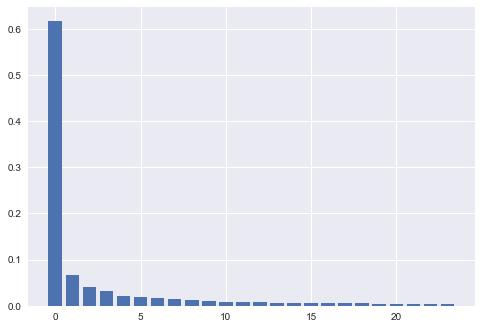

                    PC-1      PC-2      PC-3      PC-4      PC-5      PC-6  \
age             0.042532 -0.130374  0.022083 -0.186892  0.043901 -0.502558   
sex            -0.035307  0.073976  0.089873 -0.145702 -0.082685  0.415435   
PreCG.L_CT     -0.114310  0.170228 -0.067820  0.084600  0.094910  0.061595   
SFGdor.L_CT    -0.121854  0.066733 -0.145031  0.064281  0.067322 -0.036842   
ORBsup.L_CT    -0.116277 -0.129543  0.009010 -0.083006  0.049126 -0.063884   
MFG.L_CT       -0.124536  0.004964 -0.121195  0.080707  0.107490 -0.025930   
ORBmid.L_CT    -0.115312 -0.108439 -0.077063 -0.049031  0.067726 -0.119589   
IFGoperc.L_CT  -0.122203 -0.077752 -0.013649  0.158174  0.106653  0.026668   
IFGtriang.L_CT -0.124698 -0.012530 -0.086242  0.105388  0.112912 -0.014196   
ORBinf.L_CT    -0.119497 -0.024601 -0.077300 -0.059164  0.040482 -0.014046   
ROL.L_CT       -0.117909 -0.055392  0.017055  0.132705  0.190140  0.075928   
SMA.L_CT       -0.119373  0.089014 -0.050318  0.139163  0.039732

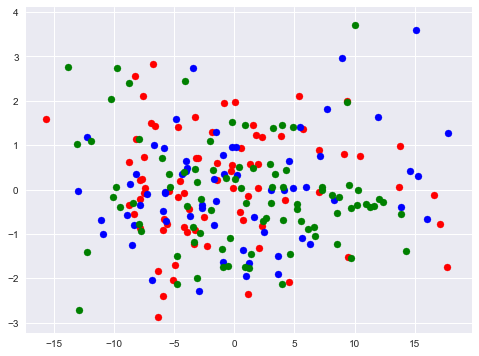

In [405]:
# PCA
from sklearn.decomposition import PCA, KernelPCA

X = G
i = np.identity(G.shape[1])
PCA_X = X.apply(zscore)
pca = PCA(n_components=24)#X.shape[1])
pca.fit(PCA_X)
print(pd.DataFrame(pca.explained_variance_ratio_))
import matplotlib.pyplot as plt
x = np.arange(0, 24, 1)
plt.bar(x,pca.explained_variance_ratio_)
plt.show()
Y = pca.fit_transform(PCA_X)
coef = pca.transform(i)
print pd.DataFrame(coef, columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6'
                                 , 'PC-7', 'PC-8', 'PC-9', 'PC-10', 'PC-11', 'PC-12'
                                 , 'PC-13', 'PC-14', 'PC-15', 'PC-16', 'PC-17', 'PC-18'
                                 , 'PC-19', 'PC-20', 'PC-21', 'PC-22', 'PC-23', 'PC-24'], index=G.columns)

fig = plt.figure(1, figsize=(8, 6))
ax = plt.scatter(Y[y==0][:, 0], Y[y==0][:, 6],color='red')
ax = plt.scatter(Y[y==1][:, 0], Y[y==1][:, 6],color='blue')
ax = plt.scatter(Y[y==2][:, 0], Y[y==2][:, 6],color='green')
plt.show()

In [ ]:
# ICA

In [ ]:
# NMF

In [ ]:
# Lasso regression

#### Ideas for biotype
&nbsp; &nbsp; 1\. Spectral clustering of CT

In [62]:
X = L

Y = X.apply(zscore,axis=0)
pca = PCA(n_components=24)
pca.fit(Y)
print(pca.explained_variance_ratio_) 
X = pd.DataFrame(pca.fit_transform(Y))

print X.shape[1]

from scipy import stats
for i in range(0,X.shape[1]-1):
    print stats.ttest_ind(X[i],X[(i+1)], equal_var = False)
    

[  6.86236311e-01   7.85834359e-02   4.48318111e-02   3.26267161e-02
   2.50482223e-02   1.98195532e-02   1.74605236e-02   1.41514912e-02
   1.30009052e-02   9.79455071e-03   9.34603815e-03   8.39628141e-03
   6.83668575e-03   5.92853783e-03   5.18959636e-03   3.85126612e-03
   3.61603942e-03   3.08261181e-03   3.00317948e-03   2.84944410e-03
   2.57762250e-03   1.99533496e-03   1.27741321e-03   4.96428718e-04]
24
Ttest_indResult(statistic=1.9137051543860316e-16, pvalue=0.99999999999999978)
Ttest_indResult(statistic=-1.3186023201948266e-16, pvalue=0.99999999999999989)
Ttest_indResult(statistic=2.550325082268497e-16, pvalue=0.99999999999999978)
Ttest_indResult(statistic=3.9510880281655691e-16, pvalue=0.99999999999999967)
Ttest_indResult(statistic=-6.7723674534413488e-16, pvalue=0.99999999999999944)
Ttest_indResult(statistic=8.6679455249652181e-16, pvalue=0.99999999999999933)
Ttest_indResult(statistic=-1.4455692732290184e-15, pvalue=0.99999999999999889)
Ttest_indResult(statistic=8.342962

In [878]:
#Pick model with its configs/hyper-paramsd
def getModel(model_choice,output_type): 
    if output_type == 'regression' :
        if model_choice == 'LR_L1':
            model_clf = Lasso()
            hyper_params = {'alpha':[0.1, 0.05, 0.01]} 
            scale_data = True 
            feat_imp = False   

        elif model_choice == 'SVR':
            model_clf = SVR()
            hyper_params = {'kernel':['linear','rbf'], 'C':[1,10,25]}
            scale_data = True 
            feat_imp = False

        elif model_choice == 'RFR':
            model_clf = RandomForestRegressor(n_jobs=4)
            hyper_params = {'n_estimators':[10,50,100,200],'min_samples_split':[2,4,8]}    
            scale_data = True    
            feat_imp = False   
        else:
            print "Unknown model choice"
    
    elif output_type =='classify':
        if model_choice == 'LR_L1':
            model_clf = LogisticRegression(penalty='l1',n_jobs=4,class_weight='balanced')
            hyper_params = {'C':[0.01,.1,1,10]} 
            scale_data = True #Scales features (z-score)            
            feat_imp = False #The learned weights of each variable

        elif model_choice == 'SVC':
            model_clf = SVC(class_weight='balanced',probability=True)
            hyper_params = {'kernel':['linear','rbf'], 'C':[1,10]}
            scale_data = True #Scales HC and CT features            
            feat_imp = False

        elif model_choice == 'RFC':    
            model_clf = RandomForestClassifier(n_jobs=4,class_weight='balanced' )
            hyper_params = {'n_estimators':[10,25,50],'min_samples_split':[2,4,8]}    
            scale_data = True            
            feat_imp = True   #RF oob based feature importance

        else:
            print "Unknown model choice"
    
    else: 
        print 'Unknown output type'

    return {'model_clf':model_clf,'hyper_params':hyper_params,'scale_data':scale_data,'feat_imp':feat_imp}

In [879]:
output_type = 'classify' #needs to be either 'classify' or 'regression'
model_list = ['LR_L1','SVC','RFC']

getModel('RFC',output_type)

{'feat_imp': True,
 'hyper_params': {'min_samples_split': [2, 4, 8],
  'n_estimators': [10, 25, 50]},
 'model_clf': RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=None, max_features='auto',
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'scale_data': True}

In [ ]:
# number of permutations
n_permutations = 1000

# store results of each permutation
sim = np.zeros((n_permutations, 1))

for n_perm in range(0, n_permutations):
    
    df = clinData_zscored
    # sample 80% of the data twice
    sub1 = df.sample(frac=0.8)
    sub2 = df.sample(frac=0.8)

    # represents which subjects from the original dataset are chosen in the subsamples
    sub1_names = np.sort(sub1.T.columns.values)  
    sub2_names = np.sort(sub2.T.columns.values)
    # subjects in common in the two subsamples
    intersect = np.intersect1d(sub1_names,sub2_names)

    intersectDF = pd.DataFrame(intersect)

    ###### replace this with your clustering technique
    # Compute the correlation distance matrix
    corr_sub1 = sub1.T.corr()
    corr_sub1 = 1-corr_sub1.fillna(0)
    corr_sub2 = sub2.T.corr()
    corr_sub2 = 1-corr_sub2.fillna(0)

    num_of_clusters = 2

    Z = linkage(sub1,method='average',metric='correlation')
    T = sch.fcluster(Z, num_of_clusters, 'maxclust')
    
    #print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4)
    
    # labeled_sub1 = place in the original dataset, info, label
    labeled_sub1 = np.column_stack((sub1.T.columns.values,sub1,T))
    labeled_sub1_df = pd.DataFrame(labeled_sub1,columns=list(['Place in dataset','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','Label']))

    
    Z = linkage(sub2,method='average',metric='correlation')
    T = sch.fcluster(Z, num_of_clusters, 'maxclust')

    #print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4)
    
    labeled_sub2 = np.column_stack((sub2.T.columns.values,sub2,T))
    labeled_sub2_df = pd.DataFrame(labeled_sub2,columns=list(['Place in dataset','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','Label']))

    #########
    # for next stage need labeled_sub1_df and labeled_sub2_df
    
    #print intersect
    labeled_intersect_labels = np.zeros((intersect.shape[0], 3))
    for x in range(0, intersect.shape[0]):
        indices1 = list(np.where(labeled_sub1_df["Place in dataset"]==intersect[x])[0])
        indices2 = list(np.where(labeled_sub2_df["Place in dataset"]==intersect[x])[0])
        #print labeled_sub2_df.iloc[indices]
        labeled_intersect_labels[x,0]=intersect[x]
        labeled_intersect_labels[x,2]=np.array(labeled_sub2_df.iloc[indices2]['Label'])
        labeled_intersect_labels[x,1]=np.array(labeled_sub1_df.iloc[indices1]['Label'])

    # labeled_intersect_labels - first column: intersecting subjects, second column: labels following clustering of subsample 1, second column: labels following clustering of subsample 2
    just_labeled_intersect_labels = labeled_intersect_labels[:,1:]

    a = labeled_intersect_labels[:,1]
    b = labeled_intersect_labels[:,2]

    # which subjects have common labels for sub1 and sub2
    Caa = np.zeros((a.shape[0], a.shape[0]))
    for x in range(0, a.shape[0]):
        for y in range(0, a.shape[0]):
            if a[x]==a[y]:
                Caa[x,y]=1

    Cbb = np.zeros((b.shape[0], b.shape[0]))
    for x in range(0, b.shape[0]):
        for y in range(0, b.shape[0]):
            if b[x]==b[y]:
                Cbb[x,y]=1

    import math
    sim[n_perm] = sum(sum(np.multiply(Caa,Cbb)))/math.sqrt(sum(sum(np.multiply(Caa,Caa)))*sum(sum(np.multiply(Cbb,Cbb))))
    #print sum(sum(np.multiply(Caa,Cbb)))/math.sqrt(sum(sum(np.multiply(Caa,Caa)))*sum(sum(np.multiply(Cbb,Cbb))))
   

In [ ]:
#2
import matplotlib.pyplot as plt
plt.hist(sim, bins='auto') 

axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,120])
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(16)

plt.show()